In [1]:
import tensorflow as tf
import pandas as pd




In [4]:

df = pd.DataFrame(pd.read_csv("data.csv", encoding='latin1'))
dates = df['InvoiceDate'].tolist()
for i in range(len(dates)):
    parts = dates[i].split(' ')[0].split('/')
    dates[i] = int(parts[0]) * (int(parts[2]) % 2) + 1
df['InvoiceDate'] = dates
print(df.tail())

       InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

        InvoiceDate  UnitPrice  CustomerID Country  
541904           13       0.85     12680.0  France  
541905           13       2.10     12680.0  France  
541906           13       4.15     12680.0  France  
541907           13       4.15     12680.0  France  
541908           13       4.95     12680.0  France  


In [5]:

udf =df.groupby('StockCode')['Quantity'].sum().reset_index().sort_values('Quantity',ascending=False)
udf.head()


,StockCode,Quantity
1147,22197,56450
2997,84077,53847
3515,85099B,47363
3536,85123A,38830
3305,84879,36221


In [6]:
df['Weight'] = df['Quantity'] * df['InvoiceDate'] / 13
wdf =df.groupby('StockCode')['Weight'].sum().reset_index().sort_values('Weight',ascending=False)
wdf.head()

,StockCode,Weight
1147,22197,37439.153846
2997,84077,28529.384615
3515,85099B,26956.153846
1982,23084,26418.615385
3305,84879,21316.769231


In [27]:
import matplotlib.pyplot as plt

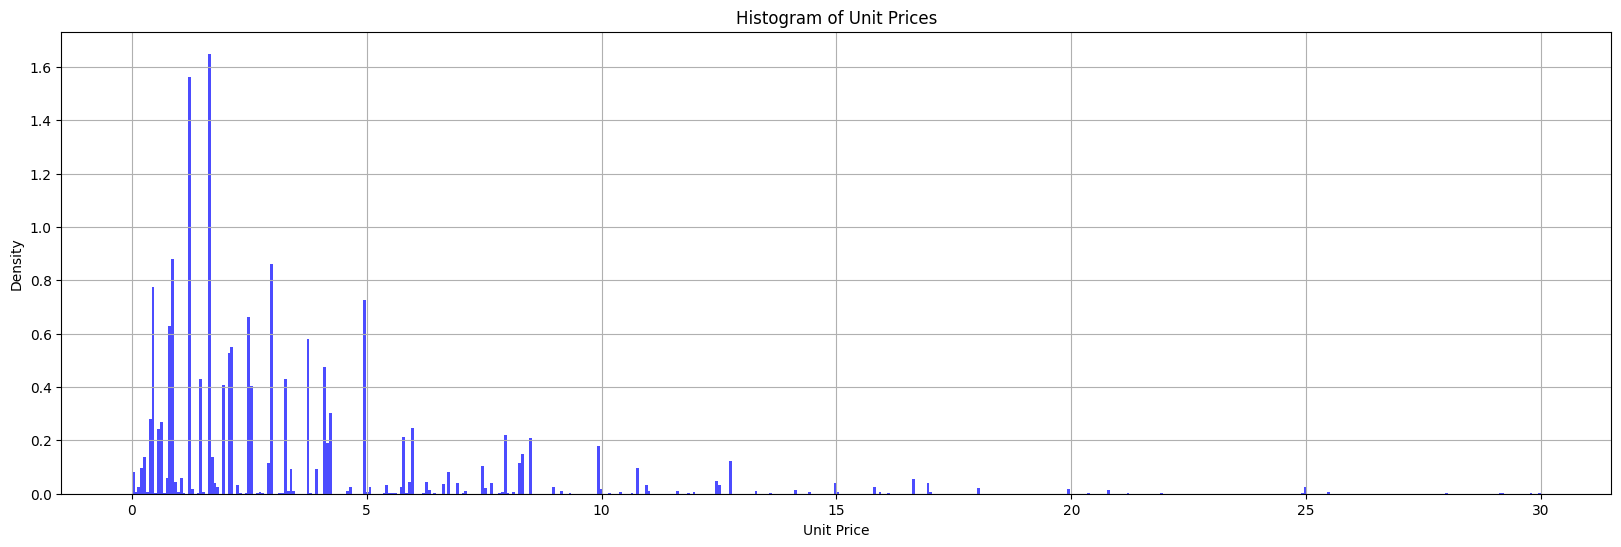

In [42]:
# plots the UnitPrice graph to demonstrate the frequency distrubition of data #
plt.figure(figsize=(20, 6))  # Adjust figure size if needed
# bins are interval number and range can be adjusted if you want to see up to 50 or 100 # 
plt.hist(df['UnitPrice'], bins=500, alpha=0.7, color='blue', density=True, range=(0, 30))  # Adjust number of bins as needed
plt.title('Histogram of Unit Prices')
plt.xlabel('Unit Price')
plt.ylabel('Density')
plt.grid(True)
plt.show()

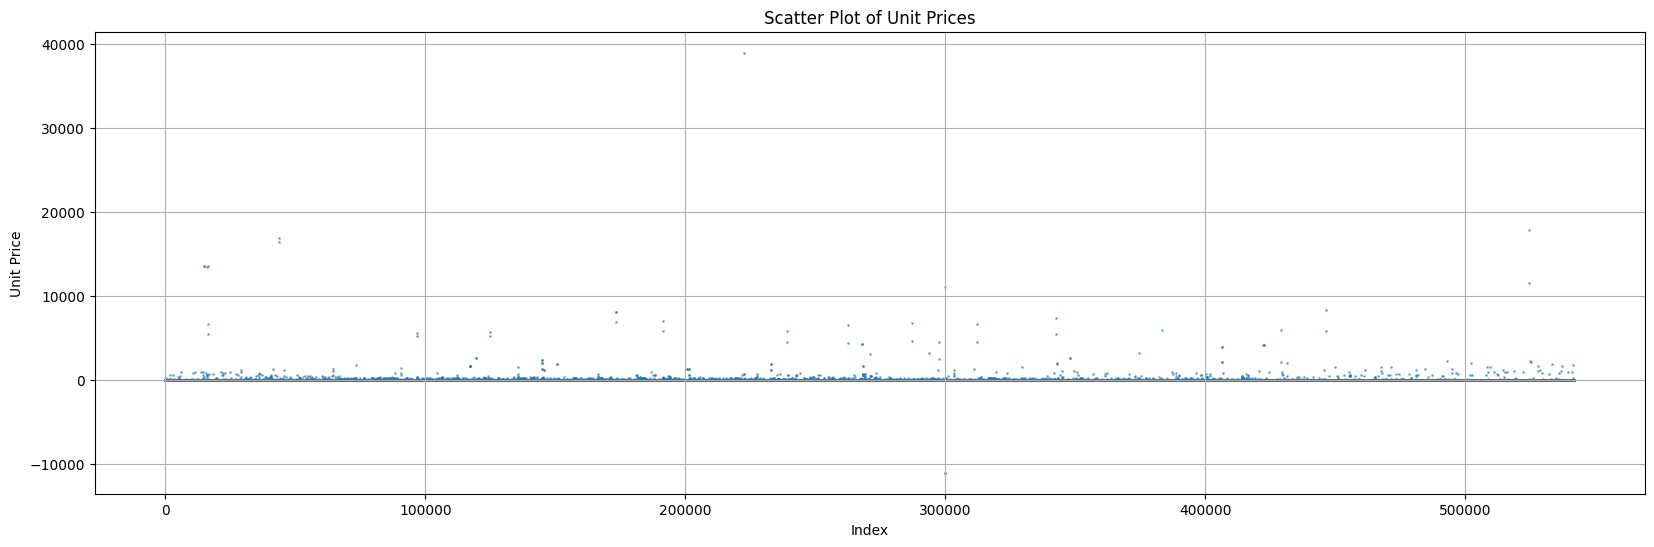

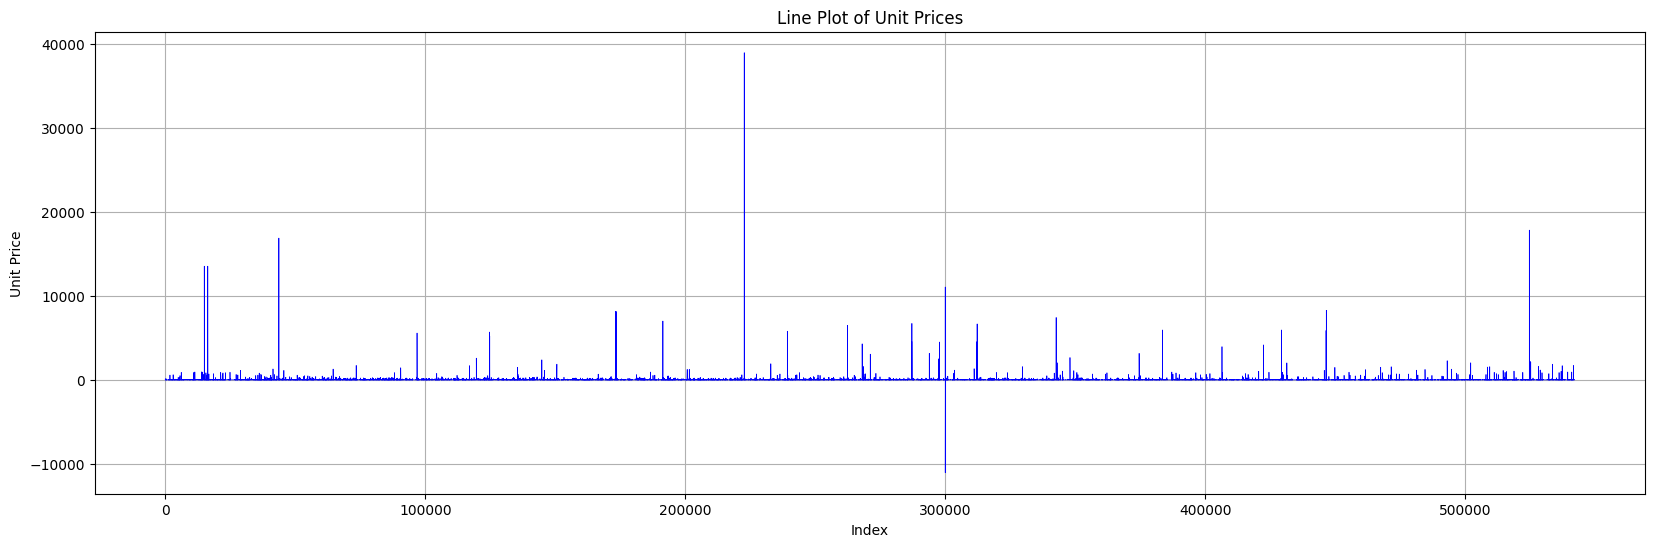

In [47]:
unit_prices = df['UnitPrice']

# Create a scatter plot
plt.figure(figsize=(20, 6))  # Adjust figure size if needed
plt.scatter(range(len(unit_prices)), unit_prices, s=1, alpha=0.5)  # Plotting against index for x-axis
plt.title('Scatter Plot of Unit Prices')
plt.xlabel('Index')
plt.ylabel('Unit Price')
plt.grid(True)
plt.show()

# Create a line plot
plt.figure(figsize=(20, 6))  # Adjust figure size if needed
plt.plot(range(len(unit_prices)), unit_prices, color='blue', linewidth=0.5)  # Plotting against index for x-axis
plt.title('Line Plot of Unit Prices')
plt.xlabel('Index')
plt.ylabel('Unit Price')
plt.grid(True)
plt.show()